In [129]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../mg-attention/")
from mgattention.parse_protein_symbols import entrez_dict
from mgattention.process_labels.get_labels import get_go_labels

def get_labels(proteins,
               obofile,
               g2gofile,
               GOT = "F",
               min_level = 5,
               min_protein_annotation = 50,
               symbol_to_id = lambda x:x):
    """
    Get the protein GO labels corresponding to a given protein.
    """
    
    go_type = "molecular_function"
    go_type = "biological_process" if GOT=="P" else go_type
    go_type = "cellular_component" if GOT=="C" else go_type
    
    filter_protein = {"namespace": go_type, "lower_bound": min_protein_annotation}
    filter_labels  = {"namespace": go_type, "min_level": min_level}
    f_labels, labels_dict = get_go_labels(filter_protein,
                                          filter_labels,
                                          proteins,
                                          lambda x: x,
                                          g2gofile,
                                          obofile,
                                          verbose = True)
    
    return f_labels, labels_dict

## <span style="color:red">Get the HuRI human network and the proteins</span>

The annotated HuRi network is annotated with entrez Id.

In [15]:
huri_network = pd.read_csv("HuRi.entrez.tsv", sep = "\t", header = None)
huri_prots   = set(huri_network[0]).union(set(huri_network[1]))

## <span style="color:red">Get the STRING human network and the proteins</span>

The annotated STRING network is also annotated with entrez Id.

In [11]:
string_network = pd.read_csv("human.STRING.entrez.tsv", sep = "\t", header = None)
string_prots   = set(string_network[0]).union(set(string_network[1]))

## <span style="color:red">Get the SUB-network constructed from the intersection of HuRI and STRING proteins</span>

| Desc.          | Freq.|
|--------------- |------|
|STRING proteins | 7365 |
|HuRI proteins   | 8224 |
|Intersection    | 3855 |

In [22]:
cprot = string_prots.intersection(huri_prots)
hsub  = ~(huri_network[0].isin(ints) & huri_network[1].isin(ints))
ssub  = ~(string_network[0].isin(ints) & string_network[1].isin(ints))

huri_net   = huri_network.drop(huri_network.index[hsub])
string_net = string_network.drop(string_network.index[ssub])

len(huri_net), len(string_net)

(11475, 13661)

## <span style="color:red"> Get GO labels for the Intersection Proteins </span>

The GO terms for MF, BP and CC hierarchies are >= 5

In [42]:
F_list, labels_F = get_labels(cprot,
                   "../../mg-attention/datasets/go/extracted/go-basic.obo",
                   "../../mg-attention/datasets/go/extracted/gene2go",
                   GOT = "F",
                   min_level = 5,
                   min_protein_annotation = 20,
                   symbol_to_id = lambda x:x)

HMS:0:00:02.150364 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: ../../mg-attention/datasets/go/extracted/gene2go 
18388 IDs in loaded association branch, molecular_function
  EXISTS: ../../mg-attention/datasets/go/extracted/go-basic.obo
../../mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 35


In [43]:
P_list, labels_P = get_labels(cprot,
                   "../../mg-attention/datasets/go/extracted/go-basic.obo",
                   "../../mg-attention/datasets/go/extracted/gene2go",
                   GOT = "P",
                   min_level = 5,
                   min_protein_annotation = 50,
                   symbol_to_id = lambda x:x)

HMS:0:00:03.871301 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: ../../mg-attention/datasets/go/extracted/gene2go 
18388 IDs in loaded association branch, biological_process
  EXISTS: ../../mg-attention/datasets/go/extracted/go-basic.obo
../../mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 44


In [44]:
C_list, labels_C = get_labels(cprot,
                    "../../mg-attention/datasets/go/extracted/go-basic.obo",
                    "../../mg-attention/datasets/go/extracted/gene2go",
                    GOT = "C",
                    min_level = 5,
                    min_protein_annotation = 30,
                    symbol_to_id = lambda x:x)

HMS:0:00:04.469913 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: ../../mg-attention/datasets/go/extracted/gene2go 
18388 IDs in loaded association branch, cellular_component
  EXISTS: ../../mg-attention/datasets/go/extracted/go-basic.obo
../../mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 40


## <span style="color:red">Computation of Average RESNIK similarities for Both HURI and STRING </span>

In [35]:
from goatools.obo_parser import GODag
from goatools.associations import read_gaf
from goatools.semantic import TermCounts, get_info_content
from goatools.semantic import resnik_sim


godag = GODag("../../mg-attention/datasets/go/extracted/go-basic.obo")
assoc_f = read_gaf("../../mg-attention/datasets/go/extracted/go-human.gaf", namespace = "MF")
assoc_p = read_gaf("../../mg-attention/datasets/go/extracted/go-human.gaf", namespace = "BP")
assoc_c = read_gaf("../../mg-attention/datasets/go/extracted/go-human.gaf", namespace = "CC")

tcount_f = TermCounts(godag, assoc_f)
tcount_p = TermCounts(godag, assoc_p)
tcount_c = TermCounts(godag, assoc_c)

../../mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms
HMS:0:00:12.848073 608,616 annotations READ: ../../mg-attention/datasets/go/extracted/go-human.gaf 
18053 IDs in loaded association branch, MF
HMS:0:00:12.493695 608,616 annotations READ: ../../mg-attention/datasets/go/extracted/go-human.gaf 
17586 IDs in loaded association branch, BP
HMS:0:00:11.791421 608,616 annotations READ: ../../mg-attention/datasets/go/extracted/go-human.gaf 
18859 IDs in loaded association branch, CC


In [63]:
def sem_similarity_(go_id, go_ids, go_dag, term_counts, avg = False):
    """
    If avg == True, compute the average Resnik Similarity Instead.
    """
    sims = [resnik_sim(go_id, go_i, go_dag, term_counts) for go_i in go_ids]
    if avg:
        return np.average(sims)
    return np.max(sims)
    
def sem_similarity(gois_1, gois_2, go_dag, term_counts, avg = False):
    """
    If avg == True, use the average Resnik Similarity, provided in Pandey et. al.
    https://academic.oup.com/bioinformatics/article/24/16/i28/201569
    """
    if avg:
        sims = [sem_similarity_(g1, gois_2, go_dag, term_counts) for g1 in gois_1]
        return np.average(sims)

In [64]:
def get_prot_lab_map(labels):
    prot_maps = {}
    for l in labels:
        for prot in list(labels[l]):
            if prot not in prot_maps:
                prot_maps[prot]  = [l]
            else:
                prot_maps[prot] += [l]
    return prot_maps

prot_F = get_prot_lab_map(labels_F)
prot_P = get_prot_lab_map(labels_P)
prot_C = get_prot_lab_map(labels_C)

In [69]:
avg_results = {"MF": [], "BP": [], "CC": []}

hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in huri_net.iterrows():
    if row[0] in prot_F and row[1] in prot_F:
        sem   = sem_similarity(prot_F[row[0]], prot_F[row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in prot_P and row[1] in prot_P:
        sem   = sem_similarity(prot_P[row[0]], prot_P[row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in prot_C and row[1] in prot_C:
        sem   = sem_similarity(prot_C[row[0]], prot_C[row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
#ss_F = lambda row: sem_similarity(prot_F[row[0]], prot_F[row[1]], go_dag, term_counts, avg = True) if row[0] in prot_F and row[1] in prot_F else 0
#x    = huri_net.apply(ss_F)
# Average for HURI

In [70]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in string_net.iterrows():
    if row[0] in prot_F and row[1] in prot_F:
        sem   = sem_similarity(prot_F[row[0]], prot_F[row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in prot_P and row[1] in prot_P:
        sem   = sem_similarity(prot_P[row[0]], prot_P[row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in prot_C and row[1] in prot_C:
        sem   = sem_similarity(prot_C[row[0]], prot_C[row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.2335388762249162, 1.511353394777959],
 'BP': [1.4047323355542256, 2.781250031037516],
 'CC': [1.0680052204453478, 1.4615708925529265]}

In [71]:
df_results = pd.DataFrame(avg_results)
df_results["Network"] = ["HuRI", "STRING-HUMAN"]

,MF,BP,CC
Network,,,
HuRI,1.233539,1.404732,1.068005
STRING-HUMAN,1.511353,2.781250,1.461571


## <span style="color:red">RESNIK Results for HURI And STRING ON THE SAME NETWORK</span>

In [76]:
df_results = df_results.set_index("Network")
df_results.to_csv("huri_string_results.tsv", sep = "\t")
df_results

,MF,BP,CC
Network,,,
HuRI,1.233539,1.404732,1.068005
STRING-HUMAN,1.511353,2.781250,1.461571


## <span style="color:red">5-fold Cross-validation on the STRING AND HuRI Networks </span> 

In [91]:
from scoring import kfoldcv, kfoldcv_sim, kfoldcv_with_pr
import numpy as np
import predict

def create_predictor(similarity_matrix, is_wt, confidence = True):
    def predictor(training_labels):
        tlabels_f = lambda i: (training_labels[i] if i in training_labels else [])
        if is_wt:
            return predict.wmv(similarity_matrix, tlabels_f, confidence = confidence)
        else:
            return predict.mv(similarity_matrix, tlabels_f, confidence = confidence)
    return predictor

def net_to_mat(df_net, prot):
    protmap = {k:i for i, k in enumerate(prot)}
    A       = np.zeros((len(protmap), len(protmap)))
    for i, r in df_net.iterrows():
        p = protmap[r[0]]
        q = protmap[r[1]]
        A[p, q] = 1.0
        A[q, p] = 1.0
    return protmap, A



In [80]:
map_S, string_A = net_to_mat(string_net, cprot)
map_H, huri_A   = net_to_mat(huri_net, cprot)

In [83]:
pid_F = {map_S[key]:val for key, val in prot_F.items()}
pid_P = {map_S[key]:val for key, val in prot_P.items()}
pid_C = {map_S[key]:val for key, val in prot_C.items()}

In [98]:
results = {"acc_F": [], "acc_P": [], "acc_C": [], "f1_P": [], "f1_C": []}

In [99]:
acc_f_huri = kfoldcv(5,
                     pid_F,
                     create_predictor(huri_A, is_wt = True, confidence = False) 
                    )
acc_f_string = kfoldcv(5,
                     pid_F,
                     create_predictor(string_A, is_wt = True, confidence = False) 
                    )

results["acc_F"] = [np.average(k) for k in [acc_f_huri, acc_f_string]]

acc_p_huri = kfoldcv(5,
                     pid_P,
                     create_predictor(huri_A, is_wt = True, confidence = False) 
                    )
acc_p_string = kfoldcv(5,
                     pid_P,
                     create_predictor(string_A, is_wt = True, confidence = False) 
                    )

results["acc_P"] = [np.average(k) for k in [acc_p_huri, acc_p_string]]

acc_c_huri = kfoldcv(5,
                     pid_C,
                     create_predictor(huri_A, is_wt = True, confidence = False) 
                    )
acc_c_string = kfoldcv(5,
                     pid_C,
                     create_predictor(string_A, is_wt = True, confidence = False) 
                    )

results["acc_C"] = [np.average(k) for k in [acc_c_huri, acc_c_string]]



In [100]:
f1_f_huri = kfoldcv_with_pr(5,
                     pid_F,
                     create_predictor(huri_A, is_wt = True) 
                    )
f1_f_string = kfoldcv_with_pr(5,
                     pid_F,
                     create_predictor(string_A, is_wt = True) 
                    )

results["f1_F"] = [np.average(k) for k in [f1_f_huri, f1_f_string]]

f1_p_huri = kfoldcv_with_pr(5,
                     pid_P,
                     create_predictor(huri_A, is_wt = True) 
                    )
f1_p_string = kfoldcv_with_pr(5,
                     pid_P,
                     create_predictor(string_A, is_wt = True) 
                    )

results["f1_P"] = [np.average(k) for k in [f1_p_huri, f1_p_string]]

f1_c_huri = kfoldcv_with_pr(5,
                     pid_C,
                     create_predictor(huri_A, is_wt = True) 
                    )
f1_c_string = kfoldcv_with_pr(5,
                     pid_C,
                     create_predictor(string_A, is_wt = True) 
                    )

results["f1_C"] = [np.average(k) for k in [f1_c_huri, f1_c_string]]



In [105]:
df_mv = pd.DataFrame(results)

In [106]:
df_mv["network"] = ["HuRI", "STRING"]

In [107]:
df_mv.set_index("network")

,acc_F,acc_P,acc_C,f1_P,f1_C,f1_F
network,,,,,,
HuRI,0.13625,0.177971,0.370664,0.231698,0.399948,0.215309
STRING,0.28000,0.363338,0.523400,0.405783,0.546200,0.340412


In [108]:
df_mv.to_csv("mv_results.tsv", sep = "\t")

## <span style="color:red">Comparing HURI Training Results between Topsy-Turvy and D-SCRIPT </span> 

<AxesSubplot:xlabel='iteration'>

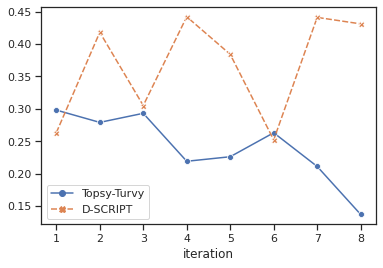

In [128]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme(style = "ticks")

ds_h = [0.263, 0.418, 0.305, 0.442, 0.384, 0.252, 0.441, 0.431]
tt_h = [0.298, 0.279, 0.293, 0.219, 0.226, 0.263, 0.211, 0.137]

ds_iter = np.arange(8) + 1

results = {"iteration": ds_iter, "Topsy-Turvy": tt_h, "D-SCRIPT": ds_h}

df_res  = pd.DataFrame(results)

df_res = df_res.set_index('iteration')
sns.lineplot(data = df_res, markers = True)

In [ ]:
"""
1) Degree Distribution Histogram of all of String, All of huri, string subnetwork and huri subnetwork. Hubs???
2) Redo resnik for all of STRING + all of GO
3) Redo the predictor: which filters out nodes based on degrees
4) Enzyme classification number. xxx
5) Threshold issue??? xxx
"""
